# Import Libs

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,LSTM ,Embedding , Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize , sent_tokenize
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix

# Read Data

In [ ]:
df = pd.read_csv('/content/train.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


# Drop NaN

In [ ]:
df.dropna(inplace = True)
df.reset_index(inplace =True)

In [ ]:
df = df.sample(frac = 1).reset_index(drop = True)

In [ ]:

df = df.head(8000)

In [ ]:
x = df[['title' , 'author' , 'text']]
y = df['label']

In [ ]:
x

,title,author,text
0,Tiny Home Test Drive - The New York Times,Penelope Green,"Last week, the first tenants moved into the ci..."
1,"Christians Martyred by ISIS: 1,131",Michael W. Chapman,"Christians Martyred by ISIS: 1,131 In addition..."
2,John Podesta Emails On “Flagging Turkish Campa...,Steve Sailer,
3,Maryland Trump Supporter: They Switched My Vot...,Paul Joseph Watson,Maryland Trump Supporter: They Switched My Vot...
4,Electoral College Settles Donald Trump’s Victo...,Jonathan Martin and Michael Wines,"WASHINGTON — In Florida, protesters swarmed..."
...,...,...,...
7995,"Inside Uber’s Aggressive, Unrestrained Workpla...",Mike Isaac,SAN FRANCISCO — When new employees join Ube...
7996,В Волге нашли американский зоопланктон,RT на русском,"Короткая ссылка 27 октября 2016, 01:21 Группа ..."
7997,John Bolton: Paris Climate Accord Objective Is...,John Hayward,Former U. N. Ambassador John Bolton spoke to B...
7998,Exclusive—Tuesday Group Co-chairman MacArthur ...,Sean Moran,Tuesday Group Tom MacArthur ( ) told Breitba...


In [ ]:
x.shape , y.shape

((8000, 3), (8000,))

In [ ]:
tensorflow.__version__

'2.4.0'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#preprocessing
import time
s = time.time()
corpus = []
for i in range(len(x)):
    if i+1 % 100 == 0:
        print(i)
    
    text = re.sub('[^a-zA-Z]' , " ", x['text'][i])
    text = text.lower()
    text = text.split()
    
    word = [words for words in text if words not in stopwords.words('english') ]
    word = " ".join(word) 
    corpus.append(word)
print('done')
print((time.time() - s)*1000)

done
614258.4156990051


In [ ]:
#prints all the data
#corpus

In [ ]:

voc_size =6000

In [ ]:
one_hot_sentence = [one_hot(words , voc_size) for words in corpus]

In [ ]:

max_length_of_sent = 50
embedding_sent = pad_sequences(one_hot_sentence,padding='pre' , maxlen=max_length_of_sent)

In [ ]:
embedding_sent[0]

array([1492, 3305, 4797, 3822, 1984, 3432, 2200, 1217, 2714,  499, 2651,
       2159, 4920, 3186, 2610, 2480, 4210, 2687, 4875, 2587, 3146, 5476,
       5356, 3647, 2417, 3801, 4829, 1217, 2854, 5477, 2848, 1498,  837,
       4210, 4875, 4846, 5600, 5369, 5916, 2879, 3671, 3965, 2114, 4495,
       2854, 4936,  181, 4708, 4591, 5751], dtype=int32)

In [ ]:
len(embedding_sent[0])

50

In [ ]:
len(embedding_sent)

8000

In [ ]:
len(x) , len(y)

(8000, 8000)

In [ ]:
embedding_feature_size = 256


In [ ]:
#make model
model = Sequential()
model.add(Embedding(voc_size , embedding_feature_size , input_length = max_length_of_sent ))
model.add(LSTM(256 , return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(128))
model.add(Dropout(0.4))
model.add(Dense(1 , activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',metrics = ['accuracy'],optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 256)           1536000   
_________________________________________________________________
lstm (LSTM)                  (None, 50, 256)           525312    
_________________________________________________________________
dropout (Dropout)            (None, 50, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,258,561
Trainable params: 2,258,561
Non-trainable params: 0
______________________________________________

In [ ]:
X = np.array(embedding_sent)
Y = np.array(y)

In [ ]:
X.shape , y.shape

((8000, 50), (8000,))

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X ,Y,test_size = 0.2 , random_state =100)

In [ ]:
#train
history = model.fit(x_train , y_train , validation_data = (x_test , y_test) , epochs =5 , batch_size= 128)

Epoch 1/5
50/50 [==============================] - 48s 900ms/step - loss: 0.5189 - accuracy: 0.7208 - val_loss: 0.3019 - val_accuracy: 0.8694
Epoch 2/5
50/50 [==============================] - 42s 849ms/step - loss: 0.1481 - accuracy: 0.9501 - val_loss: 0.3245 - val_accuracy: 0.8706
Epoch 3/5
50/50 [==============================] - 43s 856ms/step - loss: 0.0558 - accuracy: 0.9841 - val_loss: 0.5455 - val_accuracy: 0.8500
Epoch 4/5
50/50 [==============================] - 43s 871ms/step - loss: 0.0338 - accuracy: 0.9917 - val_loss: 0.6279 - val_accuracy: 0.8481
Epoch 5/5
50/50 [==============================] - 43s 857ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.6677 - val_accuracy: 0.8388


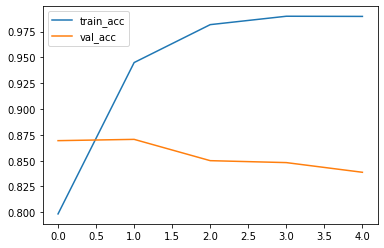

In [ ]:
plt.plot(history.history['accuracy'] , label = 'train_acc')
plt.plot(history.history['val_accuracy'] , label = 'val_acc')
plt.legend()



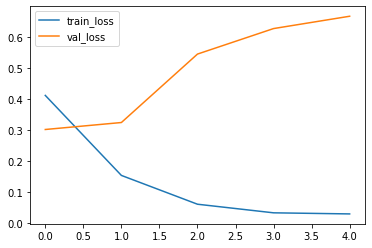

In [ ]:
plt.plot(history.history['loss'] , label = 'train_loss')
plt.plot(history.history['val_loss'] , label ='val_loss')
plt.legend()


In [ ]:
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
confusion_matrix(y_pred , y_test)

array([[804, 151],
       [107, 538]])

In [ ]:
accuracy_score(y_pred, y_test)

0.83875

In [ ]:
#Custom model 2


# User's input

In [ ]:
user_inp = ''' 'Mr Raffensperger's comment came after Mr Trump pressured him in a phone call to "find" votes proving his win.
Criticism of Mr Trump's call has been widespread, with some claiming that it amounts to illegal vote tampering.
Republicans fear that the call could undermine their efforts to win two Senate races in Georgia on Tuesday.
If Republicans win both Georgia Senate seats in the run-off election, they will retain control of the upper chamber. If their candidates lose, Democrats will control the Senate, House of Representatives and White House.
Trump's hour-long phone call fact-checked
Why is the Georgia election so important?
"He did most of the talking. We did most of the listening," Mr Raffensperger told ABC News on Monday.
"But I did want to make my points that the data that he has is just plain wrong."
He was on the phone for an hour to the president and his team on Saturday, and the audio was published by the Washington Post the following day. On Monday, Mr Raffensperger told reporters that he did not know the call was being recorded, and said he spoke to the president from his home.'''

In [ ]:
#preprocessing
import time
s = time.time()
corpus = []

text = re.sub('[^a-zA-Z]' , " ", user_inp)
text = text.lower()
text = text.split()

word = [words for words in text if words not in stopwords.words('english') ]
word = " ".join(word) 
corpus.append(word)
print('done')
print((time.time() - s)*1000)

done
33.66351127624512


In [ ]:
user_one_hot = [one_hot(words , voc_size) for words in corpus]

In [ ]:
user_one_hot

[[910,
  394,
  3624,
  2473,
  910,
  2461,
  2988,
  947,
  3388,
  5305,
  2913,
  3988,
  2765,
  2008,
  910,
  2461,
  3388,
  4680,
  735,
  4904,
  3585,
  298,
  5346,
  62,
  2089,
  3388,
  4666,
  5049,
  4413,
  2765,
  2848,
  5534,
  454,
  2224,
  3599,
  62,
  2765,
  2224,
  5534,
  5909,
  3254,
  1846,
  3907,
  3766,
  1263,
  3279,
  5107,
  2871,
  4249,
  3766,
  5534,
  1535,
  2921,
  5916,
  1535,
  2461,
  1420,
  5057,
  947,
  3388,
  4045,
  1814,
  2224,
  1846,
  4428,
  5923,
  5894,
  910,
  394,
  2719,
  5192,
  1717,
  4082,
  1342,
  2001,
  3576,
  324,
  5984,
  4566,
  947,
  1420,
  2401,
  4743,
  1635,
  3549,
  3498,
  1035,
  2385,
  2889,
  2510,
  4082,
  910,
  394,
  2719,
  3584,
  4366,
  3388,
  1386,
  3551,
  4336,
  2401,
  780]]

In [ ]:

max_length_of_sent = 50
embedding_sent_user = pad_sequences(user_one_hot,padding='pre' , maxlen=max_length_of_sent)
embedding_sent_user

array([[2921, 5916, 1535, 2461, 1420, 5057,  947, 3388, 4045, 1814, 2224,
        1846, 4428, 5923, 5894,  910,  394, 2719, 5192, 1717, 4082, 1342,
        2001, 3576,  324, 5984, 4566,  947, 1420, 2401, 4743, 1635, 3549,
        3498, 1035, 2385, 2889, 2510, 4082,  910,  394, 2719, 3584, 4366,
        3388, 1386, 3551, 4336, 2401,  780]], dtype=int32)

In [ ]:
check = np.array(embedding_sent_user)

In [ ]:
model.predict_classes(check)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)

***saving model for chrome app***

In [ ]:
model.save('model.h5')

In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    --output_format=tfjs_layers_model \
    ./model.h5 \
    ./model

2021-01-05 08:17:25.133031: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
